# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   Video Presentation Link: https://youtu.be/ACNXLxHzcqQ


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [1]:
import pandas as pd
def data_parser(csvdataset):
  maindf = pd.read_csv(csvdataset)
  '''After Converting my dataset to dataframe I  decided to begin cleaning the data by renaming relevant columns on the 
  dataframe and dropping the colums we were not going to use anymore, to  see which columns were going to be relevant to us I 
  referred to the official documentation'''
  '''
  It is important to note CBSA are the areas we are looking forward to focus on while CBG are the subvisions. we will unify these concepts while
  working with the data set
  '''
  #Looking for the meanings of the different indicators took time!
  renameDict = {"CBSA": "Location ID", "CBSA_Name": "Core Base Stastical Area", "CBSA_POP": "Total Population", "CBSA_EMP": "Total Employment", "Ac_Total": "Total Area of CBG",
                "HH": "Number of Households(CBG)", "P_WrkAge": "Percentage of Working Population", "Pct_AO0": "Percent of Household with Zero Automobiles", "Pct_AO1": "Percent of Househods with One Automobile",
                 "Pct_AO2p": "Percent of Households with two or more cars", "R_PCTLOWWAGE":"Percent of Low Wage Workers", "D3A":"Total Network Density", "D4D": "Frequency of Transit Service per square mile",
                 "D4E": "Frequency of transit service per capita", "D5AR": "Jobs within 45 minutes auto travel time", "D5AE": "Working age population within 45 minutes auto travel time",
                 "D5BR": "Jobs within 45 minutes transit commute", "D5BE":"Working age population within 45-minute transit commute", "NatWalkInd":'National Walkability Index'}
  #Dictionary used to filter and rename relevant columns.
  maindf = maindf[list(renameDict.keys())]
  maindf = maindf.rename(columns=renameDict)
  #After extensive web researching I decided just to include areas with a total population of 580,000 this would short this dataset to ~100 CBSAs. This would be a perfect sample for our CBSA.
  maindf = maindf[maindf["Total Population"].astype(int) > 580000 ]
  #Now that we have our areas targeted is time to get rid of our inconsistencies in order to start working with our averages!!
  # First inconsistency: replace all the nan values, -9999 and empty strings with the integer 0 in order to help us create averages that make sense.
  maindf = maindf.fillna(0)
  maindf.replace(-99999,0, inplace=True)
  maindf.replace("", 0, inplace= True)
  maindf.replace("N/A",0, inplace=True)
  #Now it is time for use the power of groupby functions in order to create a more concise dataframe, keep in my mind that most data is still recorded by its subdivision (CBG).
  maindf = maindf.groupby(["Location ID", "Core Base Stastical Area"]).aggregate({"Total Population":"mean", "Total Employment": "mean", "Total Area of CBG": "sum", "Number of Households(CBG)":"sum", "Percentage of Working Population": "mean",
  "Percent of Household with Zero Automobiles":"mean", "Percent of Househods with One Automobile":"mean", "Percent of Households with two or more cars":"mean","Percent of Low Wage Workers":"mean", "Total Network Density":"mean",
  "Frequency of Transit Service per square mile":"mean", "Frequency of transit service per capita":"mean","Jobs within 45 minutes auto travel time":"sum", "Working age population within 45 minutes auto travel time" :"sum",
  "Jobs within 45 minutes transit commute":"sum","Working age population within 45-minute transit commute":"sum", "National Walkability Index":"mean"})
  maindf = maindf.reset_index()
  #With our main incostencies fixed it its time to fix our number in order to present them in an uniform way for data visualization
  #The columns with total values  will be  round to entire numbers(int) and percentages will be rounded  to 2 decimals(floats).
  maindf[["Location ID","Total Population", "Total Employment", "Total Area of CBG", "Number of Households(CBG)"]] = maindf[["Location ID","Total Population", "Total Employment","Total Area of CBG", "Number of Households(CBG)"]].astype(int)
  maindf[maindf.select_dtypes(include="float").columns] = maindf.select_dtypes(include="float").round(2)
  #After this cleaning and inconsistency fixing process, I still wanted to make more modifications like ordering the dataframe by Walkability Index.
  maindf.sort_values(by="National Walkability Index", ascending= False, inplace=True)
  maindf.rename(columns={"Total Area of CBG": "Total Area(acres)","Number of Households(CBG)":"Number of Households"}, inplace= True)
  nationalwalkabilitycol = maindf.pop("National Walkability Index")
  maindf.insert(4,"National Walkability Index",nationalwalkabilitycol)
  maindf.set_index("Location ID", inplace= True)
  #Our dataset is ready to work with!!! It is incredible how a 22074 rows x 117 columns dataset became a 97 rows x 17 columns dataset!!!
  maindf.to_csv("/Users/eliaszarco/CS_2316/Final Project/PhaseII/EPA_SmartLocationDatabase_V3_cleaned.csv")
  return maindf
  

############ Function Call ############
data_parser("/Users/eliaszarco/CS_2316/Final Project/PhaseII/EPA_SmartLocationDatabase_V3_Jan_2021_Final copy.csv")

,Core Base Stastical Area,Total Population,Total Employment,National Walkability Index,Total Area(acres),Number of Households,Percentage of Working Population,Percent of Household with Zero Automobiles,Percent of Househods with One Automobile,Percent of Households with two or more cars,Percent of Low Wage Workers,Total Network Density,Frequency of Transit Service per square mile,Frequency of transit service per capita,Jobs within 45 minutes auto travel time,Working age population within 45 minutes auto travel time,Jobs within 45 minutes transit commute,Working age population within 45-minute transit commute
Location ID,,,,,,,,,,,,,,,,,,
31080,"Los Angeles-Long Beach-Anaheim, CA",13262234,6249699,13.48,3647355,4338482,0.62,0.07,0.30,0.62,0.23,24.75,90.68,0.01,2481115450,2182630214,1841994646,1349784300
41940,"San Jose-Sunnyvale-Santa Clara, CA",1981616,1077279,13.44,1724460,653265,0.62,0.05,0.25,0.71,0.16,24.44,38.83,0.01,123977256,110020600,108046518,92036709
41860,"San Francisco-Oakland-Berkeley, CA",4673221,2400290,13.14,2192692,1692047,0.63,0.11,0.32,0.57,0.17,25.10,203.92,0.01,338100994,278699035,542382083,322112055
41620,"Salt Lake City, UT",1185990,689888,13.13,5178592,389330,0.61,0.05,0.27,0.68,0.25,19.82,29.75,0.00,59376545,48445666,47440346,29335032
38900,"Portland-Vancouver-Hillsboro, OR-WA",2417931,1165042,12.75,4367486,925631,0.63,0.07,0.31,0.62,0.19,19.73,59.85,0.01,86732917,69826217,88022223,57456252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28940,"Knoxville, TN",845486,386588,7.07,2142299,335953,0.59,0.06,0.30,0.63,0.24,10.08,10.32,0.00,19360804,15138097,4582430,2269960
12940,"Baton Rouge, LA",852356,403005,6.43,2923249,310265,0.60,0.08,0.37,0.55,0.25,11.27,0.00,0.00,27497651,19792938,0,0
49180,"Winston-Salem, NC",661798,263863,6.43,1305606,262905,0.59,0.07,0.32,0.61,0.25,9.68,0.35,0.00,15145548,12388867,266980,49732


## Web Collection Requirement \#1


In [2]:
import requests
import pandas as pd
import time

def web_parser2():
    """
    In this web parser we will retrieve several indicators from United Census Bureau API using the Location ID we retrieved from our cleaned CSV File on Part 1
    We will retrieve indicators that relate to the quality of life and economic well being of the inhabitants of the this areas
    """
    #Loading our cleaned csv file and ensure that the column IDs are strings
    csv_data = pd.read_csv("EPA_SmartLocationDatabase_V3_cleaned.csv")
    msa_codes = csv_data["Location ID"].astype(str).to_list()  
    # Census API setup stating our base_url and our api_key
    base_url = "https://api.census.gov/data/2023/acs/acs1"
    api_key = "c6886343eae9f8942d04ffe9d2872f47f29bbdcd"
    # a list of variables with the specific calls we have to make to the api  in order to get the indicators.
    variables = [
        "B19013_001E",  # Median Household Income
        "B19083_001E",  # Income Inequality (Gini)
        "B17001_002E",  # Number of People in Poverty
        "B23025_005E",  # Number of Unemployed Peole
        "B15003_017E",  # Number of People with Educational Attainament(HS+)
        "B25003_002E",  # Number of Own Households
        "B25077_001E",  # Housing Affordability (Median Home Value)
        "B27010_001E",  # Number of People who have ccess to Healthcare (Health Insurance Coverage)
        "B08301_010E",  # Number of People that use public Transportatiom
        "B28002_001E",  # Number of People with internet access
        "B01003_001E", # Total Population
    ]

    all_data = []

    for msa_code in msa_codes:
        # Params stating the data we want to be retrieved
        params = {
            "get": f"NAME,{','.join(variables)}",
            "for": f"metropolitan statistical area/micropolitan statistical area:{msa_code}",
            "key": api_key
        }

        # Calling the API
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            data = response.json()
            columns = data[0]
            rows = data[1:]
            df = pd.DataFrame(rows, columns=columns)

            # Converting the string variables into integers to allow data retrieval and analysis
            for var in variables:
                df[var] = pd.to_numeric(df[var], errors='coerce')
            df["Location ID"] = msa_code
            all_data.append(df)
        else:
            print(f"Could not retrieve data for MSA code: {msa_code}") 
        
        # Pause to avoid overwhelming the server
            time.sleep(1)


    # Make sure that the data is exists and then dumping all the data into the data frame
    if all_data:
        result_df = pd.concat(all_data, ignore_index=True)
        result_df.to_csv('census_data.csv', index=False)
        print("Data extraction complete. Results saved to 'census_data.csv'.")
        return result_df

    
    
############ Function Call ############
web_parser2()

Could not retrieve data for MSA code: 17460
Could not retrieve data for MSA code: 39100
Data extraction complete. Results saved to 'census_data.csv'.


,NAME,B19013_001E,B19083_001E,B17001_002E,B23025_005E,B15003_017E,B25003_002E,B25077_001E,B27010_001E,B08301_010E,B28002_001E,B01003_001E,metropolitan statistical area/micropolitan statistical area,Location ID
0,"Los Angeles-Long Beach-Anaheim, CA Metro Area",91960,0.4879,1585798,375952,1566702,2189902,867200,12718058,210500,4542998,12799100,31080,31080
1,"San Jose-Sunnyvale-Santa Clara, CA Metro Area",153202,0.4811,143313,46430,168418,374116,1393400,1935266,28740,685743,1945767,41940,41940
2,"San Francisco-Oakland-Fremont, CA Metro Area",127792,0.4985,416535,126782,435206,975016,1105100,4537102,237054,1763465,4566961,41860,41860
3,"Salt Lake City-Murray, UT Metro Area",94409,0.4339,116525,24607,155926,306200,547500,1260873,12784,460977,1267864,41620,41620
4,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",94925,0.4490,227516,52753,279491,639150,560900,2492207,39703,1028651,2509925,38900,38900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,"Knoxville, TN Metro Area",69872,0.4834,125035,15056,159962,271369,320700,938331,2118,380978,947017,28940,28940
91,"Baton Rouge, LA Metro Area",64550,0.4942,144535,19730,157412,231880,239700,856950,3401,334402,873661,12940,12940
92,"Winston-Salem, NC Metro Area",64406,0.4458,95786,14665,110189,199948,248600,689400,1586,292187,695630,49180,49180
93,"Augusta-Richmond County, GA-SC Metro Area",67152,0.4614,91549,15672,103235,166773,238300,608357,2286,236371,628186,12260,12260


## Web Collection Requirement #2

In [3]:
import requests
from bs4 import BeautifulSoup
"""
The goal of webscraping this website is to extract data from a different source regarding the perceptions different experts have 
regarding the walkabiity aspect of different metropolitan areas, this article contains to measurements that are relavant to us and
we cant make two  data frame out of it.
"""
def web_parser2(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    #identify the different sections we want to parse out of the website
    walkability_section = soup.find('strong', string="Foot Traffic Ahead Walkability Rankings 2023").find_next('ol')
    growth_section = soup.find('strong', string="Future Growth Momentum Rankings 2023").find_next('ol')
    walkability_rankings = []
    #loop through the tags in order to get the data
    for item in walkability_section.find_all('li'):
        city, score = item.get_text().rsplit(',', 1)
        walkability_rankings.append((city.strip(), float(score.strip())))
    growth_momentum_rankings = []
    for item in growth_section.find_all('li'):
        city, score = item.get_text().rsplit(',', 1)
        growth_momentum_rankings.append((city.strip(), float(score.strip())))
    #populate our data frames and wirtie the to csv files.
    walkability_df = pd.DataFrame(walkability_rankings, columns=["City", "Score"])
    growth_momentum_df = pd.DataFrame(growth_momentum_rankings, columns=["City", "Score"])
    walkability_df.to_csv("walkabilitydata.csv")
    growth_momentum_df.to_csv("growthdata.csv")
    return growth_momentum_df, walkability_df

############ Function Call ############
web_parser2("https://www.theurbanist.org/2023/01/28/report-ranking-us-metros-shows-walkable-urbanism-pays-dividends/")
#These are two different dataframes and the output kind of conflates them but they were written to individual csv files for further analysis.



(               City  Score
 0             Tampa   67.1
 1         Nashville   61.2
 2             Miami   60.8
 3     San Francisco   59.5
 4         San Diego   57.9
 5  Dalla-Fort Worth   57.9
 6           Atlanta   55.3
 7           Orlando   55.2
 8        Sacremento   55.0
 9       San Antonio   54.9,
               City  Score
 0         New York  100.0
 1           Boston   74.3
 2  Washington D.C.   72.6
 3          Seattle   69.4
 4         Portland   68.5
 5    San Francisco   66.2
 6          Chicago   65.9
 7      Los Angeles   59.0)

In [4]:
# this function is intended to clean the second CSV we retrieved from the API, I will also fix some name inconsistencies in this dataset
def csvcleanernew(newcsv):
    maindf = pd.read_csv(newcsv)
    nameDict = {"NAME":"Core Base Stastical Area","B19013_001E": "Median Household Income", "B19083_001E":"Income Inequality (Gini)", "B17001_002E":"Number of People in Poverty",
                "B23025_005E":  "Number of Unemployed People",  "B15003_017E": "Number of People With Educational Attainment (HS+)", "B25003_002E": "Number of Owned Households",  
                "B25077_001E":"Housing Affordability (Median Home Value)",  "B27010_001E": "Number of People with Health Insurance Coverage",  
                "B08301_010E":"Number of People Using public Transportation" , "B28002_001E":"Number of People With Internet Access", "B01003_001E": "Final Total Population"}
    maindf = maindf.rename(columns=nameDict)
    maindf.set_index("Location ID", inplace=True)
    maindf.drop("metropolitan statistical area/micropolitan statistical area", axis=1, inplace=True)
    #Final inconsistency: modify the row values on the Core Stastical Base Area in order for it to match with the format given on the first table(our blue print)
    # We will combine Pandas and Regular Expression to get rid of these !
    maindf["Core Base Stastical Area"] = maindf["Core Base Stastical Area"].str.replace(r',? Metro Area$', "", regex=True)
    maindf.to_csv("clean_census_data.csv")
    return maindf
    
############ Function Call ############
csvcleanernew("/Users/eliaszarco/CS_2316/Final Project/PhaseII/census_data.csv")

,Core Base Stastical Area,Median Household Income,Income Inequality (Gini),Number of People in Poverty,Number of Unemployed People,Number of People With Educational Attainment (HS+),Number of Owned Households,Housing Affordability (Median Home Value),Number of People with Health Insurance Coverage,Number of People Using public Transportation,Number of People With Internet Access,Final Total Population
Location ID,,,,,,,,,,,,
31080,"Los Angeles-Long Beach-Anaheim, CA",91960,0.4879,1585798,375952,1566702,2189902,867200,12718058,210500,4542998,12799100
41940,"San Jose-Sunnyvale-Santa Clara, CA",153202,0.4811,143313,46430,168418,374116,1393400,1935266,28740,685743,1945767
41860,"San Francisco-Oakland-Fremont, CA",127792,0.4985,416535,126782,435206,975016,1105100,4537102,237054,1763465,4566961
41620,"Salt Lake City-Murray, UT",94409,0.4339,116525,24607,155926,306200,547500,1260873,12784,460977,1267864
38900,"Portland-Vancouver-Hillsboro, OR-WA",94925,0.4490,227516,52753,279491,639150,560900,2492207,39703,1028651,2509925
...,...,...,...,...,...,...,...,...,...,...,...,...
28940,"Knoxville, TN",69872,0.4834,125035,15056,159962,271369,320700,938331,2118,380978,947017
12940,"Baton Rouge, LA",64550,0.4942,144535,19730,157412,231880,239700,856950,3401,334402,873661
49180,"Winston-Salem, NC",64406,0.4458,95786,14665,110189,199948,248600,689400,1586,292187,695630


In [5]:
'''
This last code snippet/function will be used to append the two main dataframes into a single pandas dataframe/csv that wil help us
draw the insights on a easier way by making correlations easier to find.
'''

def finalDataFrame(csv_1, csv_2):
    df1 = pd.read_csv(csv_1)
    df2 = pd.read_csv(csv_2)
    final_dataframe = pd.merge(df1, df2, on="Location ID", how="inner")#reminds me of SQL LOL.
    final_dataframe.drop(columns="Total Population", inplace= True)
    final_dataframe.to_csv("Merged_data.csv")
    return final_dataframe
finalDataFrame("clean_census_data.csv", "EPA_SmartLocationDatabase_V3_cleaned.csv")


,Location ID,Core Base Stastical Area_x,Median Household Income,Income Inequality (Gini),Number of People in Poverty,Number of Unemployed People,Number of People With Educational Attainment (HS+),Number of Owned Households,Housing Affordability (Median Home Value),Number of People with Health Insurance Coverage,...,Percent of Househods with One Automobile,Percent of Households with two or more cars,Percent of Low Wage Workers,Total Network Density,Frequency of Transit Service per square mile,Frequency of transit service per capita,Jobs within 45 minutes auto travel time,Working age population within 45 minutes auto travel time,Jobs within 45 minutes transit commute,Working age population within 45-minute transit commute
0,31080,"Los Angeles-Long Beach-Anaheim, CA",91960,0.4879,1585798,375952,1566702,2189902,867200,12718058,...,0.30,0.62,0.23,24.75,90.68,0.01,2481115450,2182630214,1841994646,1349784300
1,41940,"San Jose-Sunnyvale-Santa Clara, CA",153202,0.4811,143313,46430,168418,374116,1393400,1935266,...,0.25,0.71,0.16,24.44,38.83,0.01,123977256,110020600,108046518,92036709
2,41860,"San Francisco-Oakland-Fremont, CA",127792,0.4985,416535,126782,435206,975016,1105100,4537102,...,0.32,0.57,0.17,25.10,203.92,0.01,338100994,278699035,542382083,322112055
3,41620,"Salt Lake City-Murray, UT",94409,0.4339,116525,24607,155926,306200,547500,1260873,...,0.27,0.68,0.25,19.82,29.75,0.00,59376545,48445666,47440346,29335032
4,38900,"Portland-Vancouver-Hillsboro, OR-WA",94925,0.4490,227516,52753,279491,639150,560900,2492207,...,0.31,0.62,0.19,19.73,59.85,0.01,86732917,69826217,88022223,57456252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,28940,"Knoxville, TN",69872,0.4834,125035,15056,159962,271369,320700,938331,...,0.30,0.63,0.24,10.08,10.32,0.00,19360804,15138097,4582430,2269960
91,12940,"Baton Rouge, LA",64550,0.4942,144535,19730,157412,231880,239700,856950,...,0.37,0.55,0.25,11.27,0.00,0.00,27497651,19792938,0,0
92,49180,"Winston-Salem, NC",64406,0.4458,95786,14665,110189,199948,248600,689400,...,0.32,0.61,0.25,9.68,0.35,0.00,15145548,12388867,266980,49732
93,12260,"Augusta-Richmond County, GA-SC",67152,0.4614,91549,15672,103235,166773,238300,608357,...,0.34,0.56,0.27,10.70,0.00,0.00,8387190,7242278,0,0


In [6]:
import pandas as pd
def percentageconverter():
  df = pd.read_csv("Merged_data.csv")
  #Lets create this loop to make the calculations super fast and easy
  number_columns = ["Number of People in Poverty", "Number of Unemployed People", "Number of People With Educational Attainment (HS+)", 
                    "Number of People with Health Insurance Coverage", "Number of People Using public Transportation",
                    "Number of People With Internet Access"]
  for col in number_columns:
      new_col = col.replace("Number of", "Percentage of")
      df[new_col] = df[col] / df["Final Total Population"] #Dividing this number columns by the estimated Total Population data.
      df.drop(columns=col, inplace= True)
  df.drop( columns="Core Base Stastical Area_y", inplace= True)
  df.to_csv("Merged_data.csv", index=False)
  return df
    



############ Function Call ############
percentageconverter()

,Unnamed: 0,Location ID,Core Base Stastical Area_x,Median Household Income,Income Inequality (Gini),Number of Owned Households,Housing Affordability (Median Home Value),Final Total Population,Total Employment,National Walkability Index,...,Jobs within 45 minutes auto travel time,Working age population within 45 minutes auto travel time,Jobs within 45 minutes transit commute,Working age population within 45-minute transit commute,Percentage of People in Poverty,Percentage of Unemployed People,Percentage of People With Educational Attainment (HS+),Percentage of People with Health Insurance Coverage,Percentage of People Using public Transportation,Percentage of People With Internet Access
0,0,31080,"Los Angeles-Long Beach-Anaheim, CA",91960,0.4879,2189902,867200,12799100,6249699,13.48,...,2481115450,2182630214,1841994646,1349784300,0.123899,0.029373,0.122407,0.993668,0.016446,0.354947
1,1,41940,"San Jose-Sunnyvale-Santa Clara, CA",153202,0.4811,374116,1393400,1945767,1077279,13.44,...,123977256,110020600,108046518,92036709,0.073654,0.023862,0.086556,0.994603,0.014771,0.352428
2,2,41860,"San Francisco-Oakland-Fremont, CA",127792,0.4985,975016,1105100,4566961,2400290,13.14,...,338100994,278699035,542382083,322112055,0.091206,0.027761,0.095294,0.993462,0.051906,0.386135
3,3,41620,"Salt Lake City-Murray, UT",94409,0.4339,306200,547500,1267864,689888,13.13,...,59376545,48445666,47440346,29335032,0.091907,0.019408,0.122983,0.994486,0.010083,0.363586
4,4,38900,"Portland-Vancouver-Hillsboro, OR-WA",94925,0.4490,639150,560900,2509925,1165042,12.75,...,86732917,69826217,88022223,57456252,0.090647,0.021018,0.111354,0.992941,0.015818,0.409833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,28940,"Knoxville, TN",69872,0.4834,271369,320700,947017,386588,7.07,...,19360804,15138097,4582430,2269960,0.132030,0.015898,0.168911,0.990828,0.002236,0.402293
91,91,12940,"Baton Rouge, LA",64550,0.4942,231880,239700,873661,403005,6.43,...,27497651,19792938,0,0,0.165436,0.022583,0.180175,0.980872,0.003893,0.382759
92,92,49180,"Winston-Salem, NC",64406,0.4458,199948,248600,695630,263863,6.43,...,15145548,12388867,266980,49732,0.137697,0.021082,0.158402,0.991044,0.002280,0.420032
93,93,12260,"Augusta-Richmond County, GA-SC",67152,0.4614,166773,238300,628186,215505,6.40,...,8387190,7242278,0,0,0.145735,0.024948,0.164338,0.968435,0.003639,0.376275




This insight of the project focuses on the logical and statistical considerations of the analysis. As outlined in the project description, I am working with standardized geographical areas across the United States, specifically urban and metropolitan regions. However, these areas vary significantly in population size, which introduces a key challenge in ensuring comparability.<br>

Additionally, one limitation of the data retrieved from the Census Bureau API is that much of the quantitative information is presented as absolute numbers (e.g., total counts of populations meeting specific criteria) rather than percentages relative to each CBSA's total population. To address this, I will perform data manipulation to calculate these percentages, ensuring that the insights derived from the analysis are both more meaningful and accurate.

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://edg.epa.gov/EPADataCommons/public/OA/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv
*   Web Collection #1 Source: https://api.census.gov/data/2023/acs/acs1?get=NAME,group(B01001)&for=us:1
*   Web Collection #2 Source: https://www.theurbanist.org/2023/01/28/report-ranking-us-metros-shows-walkable-urbanism-pays-dividends/



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Topic Summary

In progressive academic and social circles, it is widely recognized that walkability and access to public transportation enhance the overall quality of life for communities. Despite this, many urban and infrastructure developers in the United States continue to prioritize car-centric designs over pedestrian-friendly planning.<br>This project aims to explore the correlation between walkable, transit-oriented infrastructure and key economic and social indicators that serve as measurable proxies for general well-being. The analysis is based on data extracted from government databases, focusing on geographically consistent units (Core Statistical Base Areas, or CBSAs) to ensure precision and reliability.


## Insights

In [7]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
#The purpose of this insight is too find is there is a direct correlation between walkability and access to public transportatio
def insight1():
  df = pd.read_csv("Merged_data.csv")
  #Now I am going to calculate a Transportation Index by averaging together together all the percentages related to this area
  df["Public Transportation Index"] = (
      df["Frequency of transit service per capita"] * 1/3 +
      df["Percentage of People Using public Transportation"] * 1/3 +
      df["Total Network Density"] * 1/3
)
  df["Public Transportation Index"] = df["Public Transportation Index"].round(2)
# I am going to compute the correlation and the P-values for national walkability index and the newly created Public Transportation Index I created
# I am not stastician but calculated this value should be a good start for realizing if there is a tanglible correlation between this indeces
  pearson_corr,pearson_pvalue = pearsonr(
    df["National Walkability Index"],
    df["Public Transportation Index"]
  )
  spearman_corr, spearman_pvalue = spearmanr(
    df["National Walkability Index"],
    df["Public Transportation Index"]
  )
  # I am going to return the result after using the stats module
  stats_result = "Public Transportation Index vs. National Walkability Index Correlations:\n"+ f"Pearson Correlation: {pearson_corr}, P-value: {pearson_pvalue}.\n"+ f"Spearman Correlation: {spearman_corr}, P-value:{spearman_pvalue}."
  transportationIndexdf = df[["Location ID","Core Base Stastical Area_x","National Walkability Index", "Public Transportation Index"]]
  df.to_csv("Merged_data.csv", index= False)#write the new column to the Merged_data.csv
  transportationIndexdf.to_csv('transportation_correlation.csv') #Wrote this csv file in order to make the data visualiztion process easier and I clarly observe a strong correlation.
  print(stats_result)
  return transportationIndexdf

  


############ Function Call ############
insight1()

Public Transportation Index vs. National Walkability Index Correlations:
Pearson Correlation: 0.7694650783590092, P-value: 8.301505395779317e-20.
Spearman Correlation: 0.8189415627486619, P-value:3.7256787143649435e-24.


,Location ID,Core Base Stastical Area_x,National Walkability Index,Public Transportation Index
0,31080,"Los Angeles-Long Beach-Anaheim, CA",13.48,8.26
1,41940,"San Jose-Sunnyvale-Santa Clara, CA",13.44,8.15
2,41860,"San Francisco-Oakland-Fremont, CA",13.14,8.39
3,41620,"Salt Lake City-Murray, UT",13.13,6.61
4,38900,"Portland-Vancouver-Hillsboro, OR-WA",12.75,6.59
...,...,...,...,...
90,28940,"Knoxville, TN",7.07,3.36
91,12940,"Baton Rouge, LA",6.43,3.76
92,49180,"Winston-Salem, NC",6.43,3.23
93,12260,"Augusta-Richmond County, GA-SC",6.40,3.57


## Insight 1 Explanation

### Does better public transportation access implies better walkability?

For this insight, I aimed to identify a strong or direct correlation between walkability and transportation indices, based on the common assumption that access to public transportation improves walkability by reducing the reliance on cars for urban mobility.

To test this, I first created a custom "Public Transportation Index" by averaging data from three relevant indicators selected from my database. These indicators were chosen for their relevance in estimating the relationship between public transportation access and walkability.

Using Python's scipy library, I employed the pearsonr and spearmanr modules to measure both the linear (Pearson correlation) and monotonic (Spearman correlation) relationships between the Public Transportation Index and the National Walkability Index. Both correlation coefficients (r-values) fell within the range [0.7, 1.0], indicating a strong positive correlation between these factors.

To further illustrate this relationship, I organized the data into a DataFrame and exported it as a CSV file for additional analysis and visualization.

In conclusion I would say that better public transportation systems does imply that the area is more walkable.

In [8]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
#Lets see if a greater Total Population is related with walkability and better 
def insight2():
    df = pd.read_csv("Merged_data.csv")
    # Pretty similar approach to the first indicator relationship
    #I am going to perform the statistical comparison between the Number Of Population and the Walkability and Transportation Indeces.
    # Walkability
    #Creating the Dataframe
    populationdf = df[["Location ID","Core Base Stastical Area_x","Final Total Population","National Walkability Index", "Public Transportation Index"]]
    populationdf.sort_values(by="Final Total Population", ascending= False, inplace=True)
    populationdf.to_csv("Population_correlation.csv")
    #finding the correlation using Pandas
    #POP vs Walk
    correlations_walk = {
    "Pearson Correlation": populationdf["Final Total Population"].corr(populationdf["National Walkability Index"], method="pearson"),
    "Spearman Correlation": populationdf["Final Total Population"].corr(populationdf["National Walkability Index"], method="spearman"),
    }
    #Pop vs Transport
    correlations_trans = {
    "Pearson Correlation": populationdf["Final Total Population"].corr(populationdf["Public Transportation Index"], method="pearson"),
    "Spearman Correlation": populationdf["Final Total Population"].corr(populationdf["Public Transportation Index"], method="spearman"),
    }
    print("Final Total Population vs. National Walkability Index:")
    print(correlations_walk)
    print("Final Total Population vs. National Walkability Index:")
    print(correlations_trans)
    return populationdf
    

    
    
  





############ Function Call ############
insight2()

Final Total Population vs. National Walkability Index:
{'Pearson Correlation': 0.37064867728264145, 'Spearman Correlation': 0.3656355755485196}
Final Total Population vs. National Walkability Index:
{'Pearson Correlation': 0.529616609498508, 'Spearman Correlation': 0.5527571015786098}


/var/folders/0x/h5kq9h6n17v96z2zwdwrhg2c0000gn/T/ipykernel_3106/2338823320.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populationdf.sort_values(by="Final Total Population", ascending= False, inplace=True)


,Location ID,Core Base Stastical Area_x,Final Total Population,National Walkability Index,Public Transportation Index
6,35620,"New York-Newark-Jersey City, NY-NJ",19498249,12.58,8.17
0,31080,"Los Angeles-Long Beach-Anaheim, CA",12799100,13.48,8.26
14,16980,"Chicago-Naperville-Elgin, IL-IN",9262559,11.94,7.66
47,19100,"Dallas-Fort Worth-Arlington, TX",8100037,10.20,6.63
50,26420,"Houston-Pasadena-The Woodlands, TX",7510252,10.14,6.56
...,...,...,...,...,...
86,27140,"Jackson, MS",609582,7.54,3.34
75,20500,"Durham-Chapel Hill, NC",608879,8.95,3.83
45,45780,"Toledo, OH",600141,10.29,5.13
24,35300,"New Haven, CT",568158,11.23,5.12


## Insight 2 Explanation

### Does the fact of a city being bigger implies that it would be more walkable and provide better public transportation access?
In this insight, I investigated the potential correlation between a metropolitan area's population size and the primary indices used in this project. Using a methodology similar to the one employed in my earlier insights, I utilized pandas instead of scipy.

The results revealed that the correlation between the Transportation Index and population size is not strong enough to consider population size a significant factor. When examining the relationship between the Walkability Index and population size, the correlation was even weaker. These findings indicate that a city's population size does not significantly influence its walkability or transportation access.

In [9]:
#Let's see if the relationship between economic indicators, walkability and transportation
def insight3():
  """
  For the next parts of my analysis, I decided to average the indexes of both walkability and transportation in order to make the comparison easier
    We got from insight 1 that access to public transportation its closely correlated with walkability so it makes sense to average out this indeces 
    if we want to compare them both. I will call the Index "Agreggated Walkability and Public Transportation"
  """
  df = pd.read_csv("Merged_data.csv")
  #Creating the new index
  df["Aggregated Walkability and Public Transportation"] = (df["National Walkability Index"] * 1/2 + df["Public Transportation Index"] * 1/2)
  df["Aggregated Walkability and Public Transportation"] = df["Aggregated Walkability and Public Transportation"].round(2)
  df.to_csv("Merged_data.csv", index= False)
  #Now time to compare to our new index with Gini Coefficent (inequality) and Median Household Income
  #I chose to do this by creatinf an aggregated relatinship table
  #Defining the quantiles
  df["Index Quantile"] = pd.qcut(df["Aggregated Walkability and Public Transportation"], q=4) # I dont really want to write this into my FILE
  relationship_table = df.groupby("Index Quantile")[["Income Inequality (Gini)", "Median Household Income"]].mean()
  relationship_table.to_csv("Economic Indicators Correlation.csv")
  return relationship_table

  

  

  





############ Function Call ############
insight3()

/var/folders/0x/h5kq9h6n17v96z2zwdwrhg2c0000gn/T/ipykernel_3106/4240225345.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relationship_table = df.groupby("Index Quantile")[["Income Inequality (Gini)", "Median Household Income"]].mean()


,Income Inequality (Gini),Median Household Income
Index Quantile,,
"(4.829, 7.11]",0.470292,72675.750000
"(7.11, 7.82]",0.466163,75665.125000
"(7.82, 8.8]",0.454204,82596.086957
"(8.8, 10.87]",0.469054,93906.916667


## Insight 3 Explanation
### How are economic indicators related to the both Walkability and Transportation?
For this analysis, I compared the Gini Coefficient, which measures income inequality, and the Median Household Income of the Core Base Statistical Areas (CBSAs) with an aggregated Walkability and Public Transportation index that I computed using Pandas. To better understand the relationships, I divided this new index into quantiles.

The results revealed a direct relationship between Median Household Income and the aggregated index. This suggests that walkability and access to public transportation may influence income levels or vice versa. This relationship aligns with macroeconomic factors such as tax rates and local budgets, which are often linked to urban infrastructure development.

On the other hand, there was no significant correlation between the aggregated index and income inequality, as the Gini Coefficient values remained consistent across different levels of walkability and transportation access. This finding challenges claims that walkable infrastructure and public transportation can significantly reduce income inequality.



In [10]:
# Now I want to contrast quality of life vs my updated Aggregated Walkability and Public Transportation indicator
def insight4():
  df = pd.read_csv("Merged_data.csv")
  #There is positive and negative indicator human development I just aggregated them
  df["Negative Human Development Indicators Index"] = df[["Percent of Low Wage Workers", "Percentage of People in Poverty", "Percentage of Unemployed People"]].mean(axis=1) 
  df["Positive Human Development Indicators Index"] = df[["Percentage of People With Educational Attainment (HS+)", "Percentage of People with Health Insurance Coverage","Percentage of People With Internet Access"]].mean(axis=1)
  df["Negative Human Development Indicators Index"] = df["Negative Human Development Indicators Index"].round(3)
  df["Positive Human Development Indicators Index"] = df["Positive Human Development Indicators Index"].round(3)
  df.to_csv('Merged_data.csv', index= False)
  #Lets create a Table in order to compare the realationship of my Index with the negatve and positive indicators
  metrics = []
  # for loop in order to not the process twice
  for indicator in ["Negative Human Development Indicators Index", "Positive Human Development Indicators Index"]:
        correlation = df["Aggregated Walkability and Public Transportation"].corr(df[indicator])
        mean_ratio = (df["Aggregated Walkability and Public Transportation"] / df[indicator]).mean() 
        std_ratio = (df["Aggregated Walkability and Public Transportation"] / df[indicator]).std()
        # used several statistical measurements.
        metrics.append({
            "Indicator": indicator,
            "Correlation": round(correlation, 3),
            "Mean Ratio": round(mean_ratio, 3),
            "Ratio Std Dev": round(std_ratio, 3),
        })

    # Convert to a DataFrame for tabular output
  comparison_df = pd.DataFrame(metrics)
  return comparison_df






############ Function Call ############
insight4()

,Indicator,Correlation,Mean Ratio,Ratio Std Dev
0,Negative Human Development Indicators Index,-0.369,64.309,16.860
1,Positive Human Development Indicators Index,-0.282,15.557,2.926


## Insight 4 Explanation
### Are quality of life measures impacted by Walkable Infrastructure and Public Transportation access?
For this insigh, I looked at how Negative and Positive Human Development indicators relate to the Aggregated Walkability and Public Transportation Index I created. To measure this, I made two new indicators by averaging data from my main Pandas DataFrame that seemed to represent negative and positive development.

The results were surprising. Both indicators showed weak correlations, with values around -0.2 and -0.3 for the positive ones, meaning there was only a small negative relationship. This challenged one of the main ideas of my project — that walkability and public transportation have a big impact on human development.

On top of that, the data I used for the indicators had very high averages and large standard deviations. This makes me think they might not have been the best indicators to use for this analysis. These issues could explain why the results didn’t match my expectations, and they show that I might need better indicators to draw stronger conclusions.

In [11]:
#Geographical Analysis of my the Aggregated Walkability and Public Transporation Index.
def insight5():
    df = pd.read_csv('Merged_data.csv')
    df['State'] = df['Core Base Stastical Area_x'].str.extract(r',\s*([A-Z]{2}(?:-[A-Z]{2,})?)$')#complicated regex pattern to extract the state
    state_to_region = {
    'CA': 'West', 'NY': 'Northeast', 'UT': 'West', 'OR': 'West', 'WA': 'West',
    'TX': 'Southwest', 'OK': 'Southwest', 'AZ': 'Southwest', 'NM': 'Southwest',
    'FL': 'Southeast', 'GA': 'Southeast', 'AL': 'Southeast', 'MS': 'Southeast',
    'TN': 'Southeast', 'KY': 'Southeast', 'NC': 'Southeast', 'SC': 'Southeast',
    'VA': 'Southeast', 'WV': 'Southeast', 'PA': 'Northeast', 'NJ': 'Northeast',
    'DE': 'Northeast', 'MD': 'Northeast', 'CT': 'Northeast', 'RI': 'Northeast',
    'MA': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'ME': 'Northeast',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',
    'AK': 'West', 'HI': 'West', 'NV': 'West', 'ID': 'West', 'MT': 'West',
    'WY': 'West', 'CO': 'West', 'AR': 'Southwest', 'LA': 'Southwest',
    'VT': 'Northeast', 'DC': 'Northeast'
    } #Dictionary to make the mapping proccess way easier.

    #Function to handle multi states metropolitan areas(they are count for both)
    def split_states(row):
        if isinstance(row['State'], str):  
            states = row['State'].split('-')  
            return pd.DataFrame({'State': states, 
            'Region': [state_to_region.get(s, 'Other') for s in states],
            'Aggregated Walkability and Public Transportation': 
            [row['Aggregated Walkability and Public Transportation']] * len(states)})
        return None
    #apply this function to the original Dataframe.
    expandeDf = pd.concat(df.apply(split_states, axis=1).tolist(), ignore_index=True)
    #Group By State
    state_aggregated_df = expandeDf.groupby('State')['Aggregated Walkability and Public Transportation'].mean().reset_index()
    region_aggregated_df = expandeDf.groupby('Region')['Aggregated Walkability and Public Transportation'].mean().reset_index()
    state_aggregated_df.to_csv('State_analysis.csv')
    region_aggregated_df.to_csv('Region_Analysis.csv')
    print(state_aggregated_df)
    return region_aggregated_df

############ Function Call ############
insight5()

   State  Aggregated Walkability and Public Transportation
0     AL                                          6.440000
1     AR                                          6.480000
2     AZ                                          8.555000
3     CA                                          9.351000
4     CO                                          9.265000
5     CT                                          7.686667
6     FL                                          8.038750
7     GA                                          5.755000
8     HI                                          9.150000
9     IA                                          7.795000
10    ID                                          8.060000
11    IL                                          8.790000
12    IN                                          8.196667
13    KS                                          7.780000
14    KY                                          7.590000
15    LA                                          7.1800

,Region,Aggregated Walkability and Public Transportation
0,Midwest,7.896364
1,Northeast,8.480526
2,Other,5.910000
3,Southeast,6.716429
4,Southwest,7.757857
5,West,9.214762


## Insight 5 Explanation 
### What is the geographic distribution of Walkability and Public Transportation accross the United States of America?
For this insight, I used the Aggregated Walkability and Public Transportation Index I’ve been working with throughout the semester to analyze its averages across individual U.S. states and regions. To do this, I created a dictionary mapping each U.S. state to its corresponding geographic region and extracted the state information from the CBSAs we’ve been working with throughout the project.

After extracting the states, I created aggregated DataFrames for both states and regions to simplify future visualizations. The results confirmed many common assumptions: the West Coast, often associated with progressive policies, showed high Walkability and Public Transportation Index scores, while the Southeast, known for being more car-centric, scored lower on these indices.

## Data Visualizations

In [12]:
import plotly.express as px
#Correlation between Public Trasportation Access and Walkability Indeces
# Scatter Plot to highlight the perfectly linear relationship found.
def visual1():
    df = pd.read_csv("transportation_correlation.csv")
    correlation, _ = pearsonr(df["National Walkability Index"], df["Public Transportation Index"])
    fig  = px.scatter(df, x ="National Walkability Index", y = "Public Transportation Index",
                      title=f"Correlation between Walkability and Public Transportation (r = {correlation:.2f})",
                      labels= {"National Walkability Index": "Walkability Index",
                      "Public Transportation Index": "Transportation Index"},
                       hover_data=["Core Base Stastical Area_x"], trendline="ols")
    fig.update_layout(title = dict(font=dict(size=20, color="black"), x=0.5),
                      plot_bgcolor="lightgrey")
    fig.write_image("Transportationcorr.jpg")
    fig.show()



############ Function Call ############
visual1()

### Visualization 1 Explanation

Derived from Insight 1, this scatter plot shows the strong correalation between the Transportation Index and Walkability Index solidifying the claim that they are closely correlated. This also justifies the creation of an aggregated index that measures both of them.

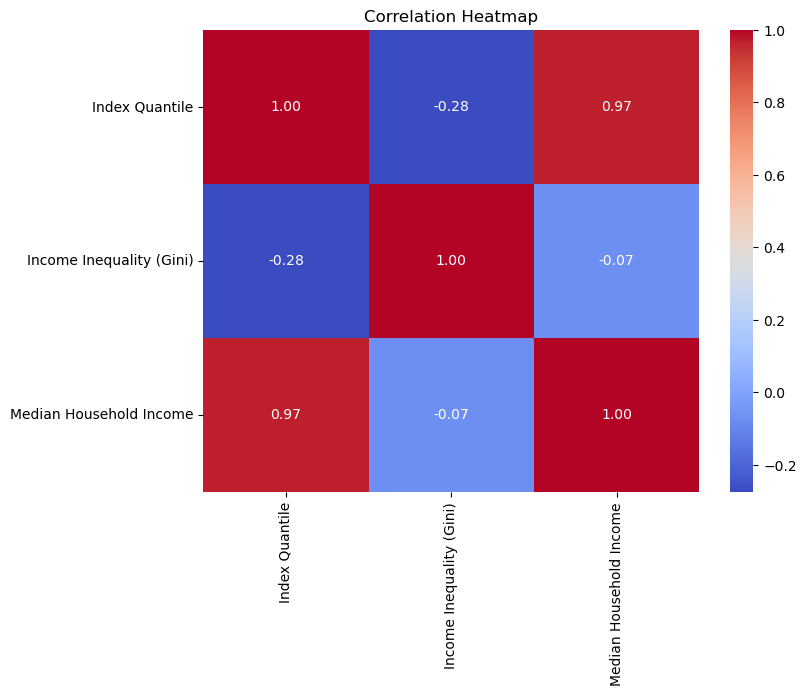

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#HeatMap to see how correlated are The Aggregated Walkability and Transportation Index, Gini Coefficient and Median Household Income
def visual2():
  df = pd.read_csv("Economic Indicators Correlation.csv")
  df["Index Quantile"] = df["Index Quantile"].astype('category').cat.codes
  correlation_matrix = df[["Index Quantile","Income Inequality (Gini)","Median Household Income"]].corr()
  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
  plt.title("Correlation Heatmap")
  plt.savefig("Correlation_heatmap.jpg")
  plt.show()



  
  


  





############ Function Call ############
visual2()

### Visualization 2 Explanation

Derived from Insight 3, this heatmap shows the correlation between three indicators: Aggregated Walkability and Public Transportation, Median Household Income and Gini Coefficient. In this covariance matrix we can observe that both Aggregated Walkability and Public Transportation and Household Income are related with each other, however the Gini coefficient fails to be affected by these two factors.

In [14]:
def visual3():
  df = pd.read_csv("State_analysis.csv")
  fig = px.choropleth(df, locations="State", locationmode="USA-states", color="Aggregated Walkability and Public Transportation",
         color_continuous_scale="YlGnBu", scope="usa", title="Aggregated Walkability and Public Transportation Across States")
  fig.update_layout(title=dict(font=dict(size=20, color="black"), x= 0.5), 
                    coloraxis_colorbar= dict(title = "Walkability<br>& Transportation"))
  fig.write_image("Map.jpg")
  fig.show()
  





############ Function Call ############
visual3()

### Visualization 3 Explanation
Derived from Insight 5, this visual captures geographic trends through the United States regarding Walkability and Public Transportation, confirming certain trends and assumptions.



# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:<br>
https://www.youtube.com/watch?v=o7VCeCxHCTI I used this video in order to inform myself on how to do the scipy calculations.


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
